<a href="https://colab.research.google.com/github/SanskrutiPanda/18CSE103/blob/main/DMDW_ASSIGNMENT_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machinery Analysis
- Here we are given with a dataset thatcontains data of 1000 machines of a factory, data collected includes some 
 properties of the machines like –
1. Lifetime of the machine in months
2. when the data was recorded what was the condition of the machine (1= damaged, 0= not damaged)
3. Pressure
4. Moisture
5. Temperature
6. Team – Team A, B or C – the team which was handing the machine
7. Provider – manufacturer or seller of the machine


#### Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Importing file

In [ ]:
url="https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/maintenance_data.csv"
df=pd.read_csv(url)
df

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1
...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4


In [ ]:
df.columns

Index(['lifetime', 'broken', 'pressureInd', 'moistureInd', 'temperatureInd',
       'team', 'provider'],
      dtype='object')

In [ ]:
df['team'].unique()

array(['TeamA', 'TeamC', 'TeamB'], dtype=object)

In [ ]:
df['provider'].unique()

array(['Provider4', 'Provider1', 'Provider2', 'Provider3'], dtype=object)

We didn't get any null value as unique value in provider and team . So team and provider column 
don't have any null value.

In [ ]:
df.duplicated().sum()

0

No duplicate row exist in the dataframe .

In [ ]:
df.to_excel(r"E:\assignment.xlsx")

stored the data in the excel file so that we can access the data easily

In [ ]:
df.describe()

,lifetime,broken,pressureInd,moistureInd,temperatureInd
count,1000.000000,1000.000000,996.000000,1000.000000,997.000000
mean,55.195000,0.397000,98.681100,111.088723,100.553499
std,26.472737,0.489521,19.879703,41.839005,19.592059
min,1.000000,0.000000,33.481917,70.928815,42.279598
25%,34.000000,0.000000,85.562282,94.532547,87.672094
50%,60.000000,0.000000,97.311091,102.844084,100.528015
75%,80.000000,1.000000,112.253190,113.532970,113.522496
max,93.000000,1.000000,173.282541,1156.493254,172.544140


- From the above analysis it can be seen that moistureInd of 75% of machine is less than 113.5 but the maximum
moisture value is 1156.4 which is a very large value.
- So we can say that this outlier can be a wrong value or any value taken mistakenly from the user while entering the
data

In [ ]:
df.moistureInd.quantile(0.999)

200.0960715468762

Here we calculated the quantile and got to know that 99.9% machinery operate under 200.09 so the maximum moisture value
must be a wrong value so we have to discard it .

In [ ]:
df.shape 

(1000, 7)

The shape is 1000,7

In [ ]:
df=df[df.moistureInd<=df.moistureInd.quantile(0.999)]
df.shape

(999, 7)

After removing the outlier value the shape is (999,7) . From this we came to know that only one machinery was 
operating in maximum moistureInd and we removed that data

In [ ]:
df.isnull().sum()

lifetime          0
broken            0
pressureInd       4
moistureInd       0
temperatureInd    3
team              0
provider          0
dtype: int64

- 4 null value exist in pressure and 3 null value exist in temperature column.
- Since the data is numerical we have to check its skeweness and accordingly fill the missing value.

In [ ]:
df.skew()

lifetime         -0.405939
broken            0.424245
pressureInd       0.117096
moistureInd       1.588525
temperatureInd   -0.071326
dtype: float64

- Here only temperatureInd is non-skewed and others are skewed
- Hence fill missing values of temperature with the mean value of temperature
- Fill the pressure missing values with the median value

In [ ]:
df['temperatureInd'].fillna(df['temperatureInd'].mean(),inplace=True)
df

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1
...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4


In [ ]:
df['pressureInd'].fillna(df['pressureInd'].median(),inplace=True)
df

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1
...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4


In [ ]:
df.isnull().sum()

lifetime          0
broken            0
pressureInd       0
moistureInd       0
temperatureInd    0
team              0
provider          0
dtype: int64

Now we have no missing values in our dataframe so our data is ready for the next step .

## Explaratory analysis

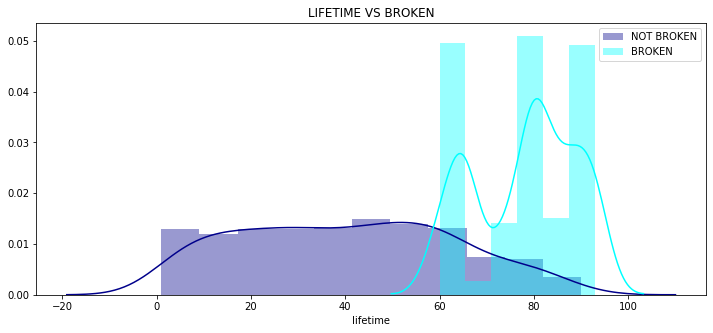

In [ ]:
#Analytics between numeric vrs categorical:-
#lifetime vrs broken
plt.figure(figsize=(12,5))
plt.title("LIFETIME VS BROKEN")
sns.distplot(df.lifetime[df.broken==0],color="darkblue")
sns.distplot(df.lifetime[df.broken==1],color="cyan")
plt.legend(['NOT BROKEN','BROKEN'])
plt.show()

From the above analysis it can be stated that when the value of lifetime goes up the machineries start breaking .
It can be explained as when we use the machineries for long period of time it breaks . 

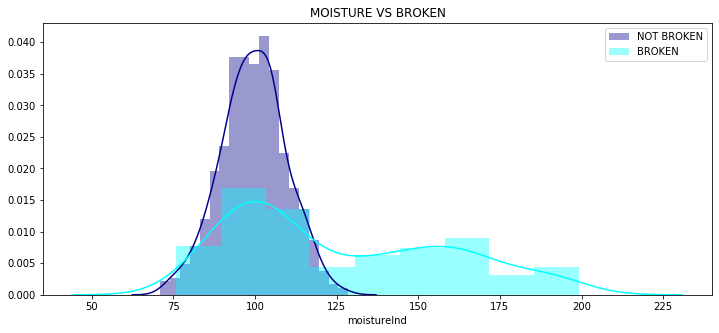

In [ ]:
#Analytics between numeric vrs categorical:-
#moisture vrs broken
plt.figure(figsize=(12,5))
plt.title("MOISTURE VS BROKEN")
sns.distplot(df.moistureInd[df.broken==0],color="darkblue")
sns.distplot(df.moistureInd[df.broken==1],color="cyan")
plt.legend(['NOT BROKEN','BROKEN'])
plt.show()

From the above Graph it is clear that when the moistureInd is greater more machinery is breaking . So we should always
keep the moistureInd a bit low so that it will not break earlier .

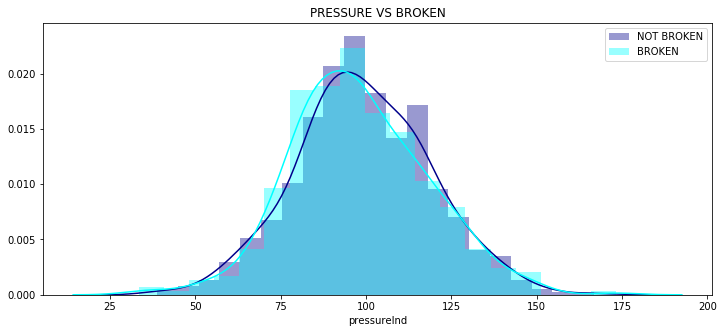

In [ ]:
#Analytics between numeric vrs categorical:-
#pressure vrs broken
plt.figure(figsize=(12,5))
plt.title("PRESSURE VS BROKEN")
sns.distplot(df.pressureInd[df.broken==0],color="darkblue")
sns.distplot(df.pressureInd[df.broken==1],color="cyan")
plt.legend(['NOT BROKEN','BROKEN'])
plt.show()

From the above analysis we can state that pressure does not affect the breaking and not breaking  of machineries . So no steps should
be taken to maintain the pressure level .

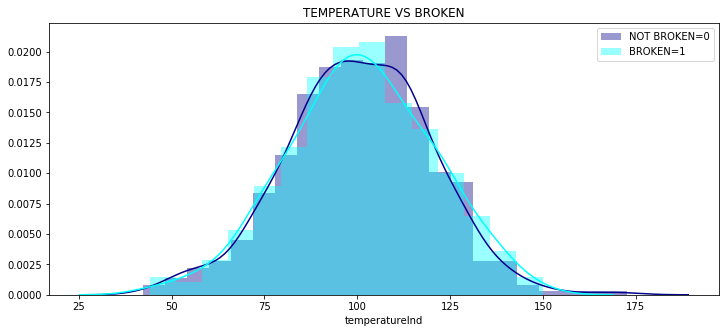

In [ ]:
#Analytics between numeric vrs categorical:-
#teperature vrs broken
plt.figure(figsize=(12,5))
plt.title("TEMPERATURE VS BROKEN")
sns.distplot(df.temperatureInd[df.broken==0],color="darkblue")
sns.distplot(df.temperatureInd[df.broken==1],color="cyan")
plt.legend(['NOT BROKEN=0','BROKEN=1'])
plt.show()

From the above analysis we can state that temperature does not affect the breaking and not breaking of machineries .
So no steps should be taken to maintain the pressure level .

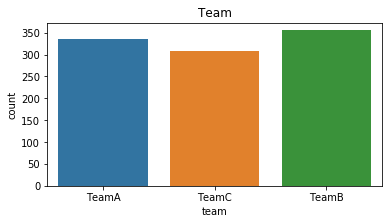

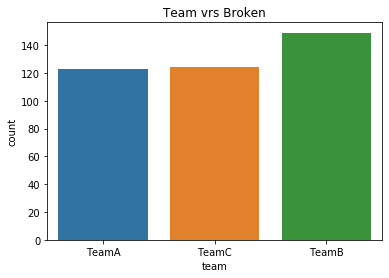

In [ ]:
#categorical vs categorical
#team vs broken
plt.figure(figsize=(6,3))
sns.countplot(df.team,order = df.team.unique())
plt.title("Team")
plt.show()
sns.countplot(df.team[df.broken==1],order = df.team.unique())
plt.title("Team vrs Broken")
plt.show()

From the above analysis it can be seen that TeamB is breaking more machinery hence they should be warned to use
the machineries properly .

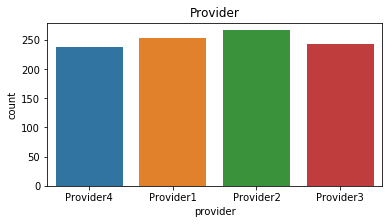

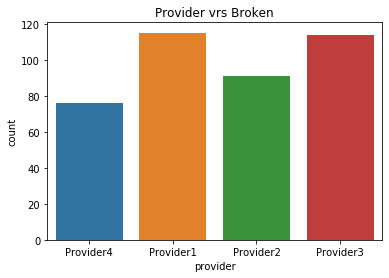

In [ ]:
#categorical vs categorical
#provider vrs broken
plt.figure(figsize=(6,3))
sns.countplot(df.provider,order = df.provider.unique())
plt.title("Provider")
plt.show()
sns.countplot(df.provider[df.broken==1],order = df.provider.unique())
plt.title("Provider vrs Broken")
plt.show()

From the above analysis it can be observed that the machineries of provider3 and provider1 breaks more , they may 
provide low quality machinery but incase of provider2 and provider4 the machineries are not breaking more .
So the product should be bought from provider2 or privider4

<Figure size 576x288 with 0 Axes>

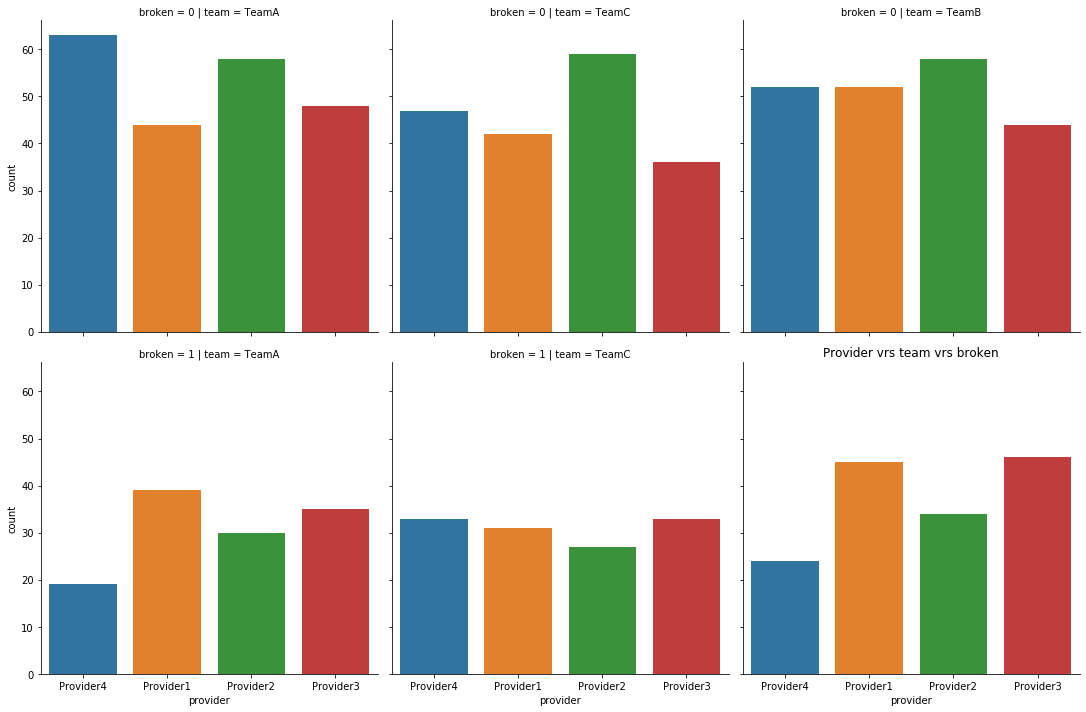

In [ ]:
#categorical vs categorical vs categorical
plt.figure(figsize=(8,4))
sns.catplot(x='provider',col='team',row='broken',kind='count',data=df)
plt.title("Provider vrs team vrs broken")
plt.show()

From the above analysis we can state that breaking of machineries are lesser incase of teamC . So teamC is utilising
the machinvery in an appropriate way . But the bt=reaking ratio is greater incase of team and team so they should
take care of machineries while using it .

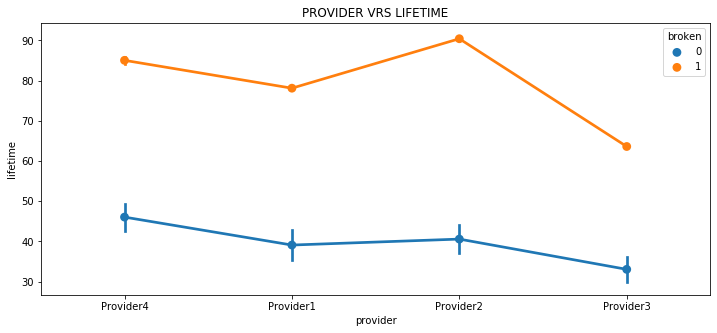

In [ ]:
plt.figure(figsize=(12,5))
sns.pointplot(x = 'provider',y='lifetime',hue='broken',data=df)
plt.title("PROVIDER VRS LIFETIME")
plt.show()

From the above analysis it can be observed that the machineries of provider3 and provider1 breaks more , they may 
provide low quality machinery but incase of provider2 and provider4 the machineries are not breaking more .
So the product should be bought from provider2 or privider4

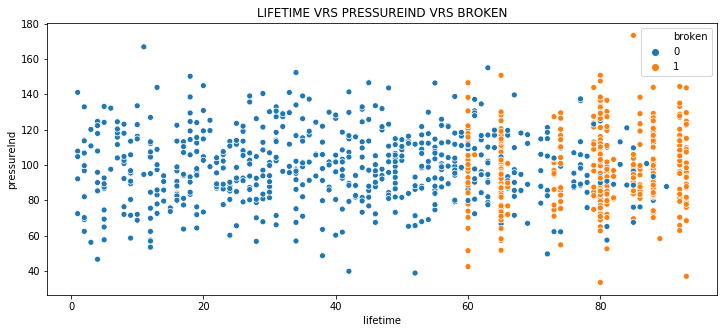

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='lifetime',y='pressureInd',hue='broken',data=df)
plt.title("LIFETIME VRS PRESSUREIND VRS BROKEN")
plt.show()

From the above graph we can observe that when lifetime and pressure increses breaking of machinery also increses .
here the machine starts breaking when :-
    - Lifetime is 60 and the oressure is 40-60 very few machine starts breaking.
    - When the lifetime is 80 and pressure is above 60 breaking increses .
    - When the lifetime is after 80 and pressure is from 40 and above then almost all the machines are broken .


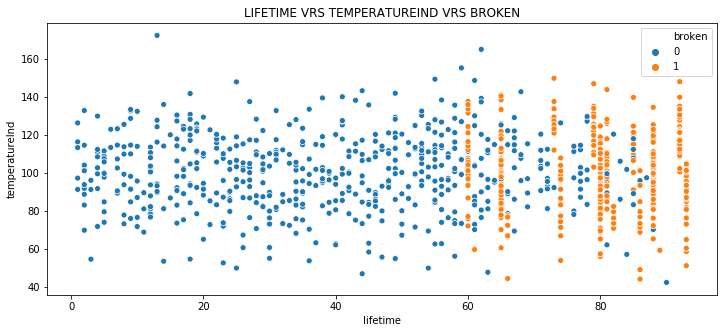

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='lifetime',y='temperatureInd',hue='broken',data=df)
plt.title("LIFETIME VRS TEMPERATUREIND VRS BROKEN")
plt.show()

From the above graph we can observe that when lifetime and temperature increses breaking of machinery also increses .
here the machine starts breaking when :-
    - Lifetime is 60 and the temperature is 40-60 very few machine starts breaking.
    - When the lifetime is 80 and temperature is above 60 breaking increses .
    - When the lifetime is after 80 and temperature is from 40 and above then almost all the machines are broken .


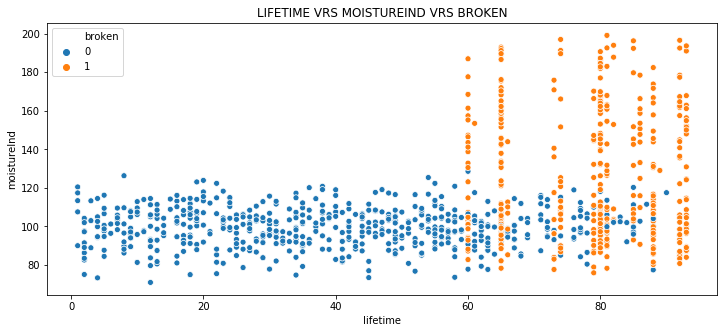

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='lifetime',y='moistureInd',hue='broken',data=df)
plt.title("LIFETIME VRS MOISTUREIND VRS BROKEN")
plt.show()

- From the above figure it is clear that until the lifetime of machines turns out to be 60 there is no breakage in 
machineries .
- From the life time of 60, machines starts breaking.
- When the moisture turns out to be 60 and above and with a lifetime from 60 the machines starts breaking .
- Around the lifetime of 80 , there is more breakage of machineries .

### HeatMap for correlation analysis:-

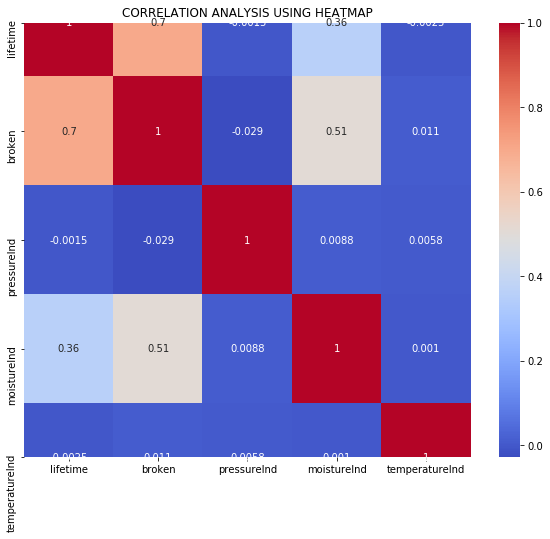

In [ ]:
cor=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.title("CORRELATION ANALYSIS USING HEATMAP")
plt.show()

From the above Heatmap we can observe that :-
    - broken and lifetime has a +ve correlation value i.e machines break more by increasing time
    - broken and moistureInd has a strong +ve correlation value i.e machines break more when moisture level increases